# **Unsupervised Learning on Country Data**
#### DTSA 5510 - Unsupervised Algorithms in Machine Learning - Final Project  ####
<hr>
<hr>

> [**1. Project Overview**](#section1)
> 
> [**2. Project Setup**](#section2)
>
> [**3. Data Description and Distribution**](#section3)
>> [*3.1. Data Description*](#section3.1)
>> 
>> [*3.2. Data Distribution*](#section3.2)
>>
>> [*3.3. Feature Plots*](#section3.3)
>
> [**4. Data Evaluation and Reduction**](#section4)
>> [*4.1. Correlations*](#section4.1)
>>
>> [*4.2. Scaling*](#section4.2)
>>
>> [*4.3. Principal Component Analysis (PCA)*](#section4.3)
> 
> [**5. Model: K-Means Clustering**](#section5)
>
> [**6. Cluster Analysis**](#section6)
>> [*6.1. Cluster Plots*](#section6.1)
>>
>> [*6.2. Cluster Characteristics*](#section6.2)
>>
>> [*6.3. Cluster Descriptions*](#section6.3)
>
> [**7. Results**](#section7)
>
> [**8. Discussion/Conclusion**](#section8)
<hr><hr>

## <a class="anchor" id="section1">**1) Project Overview**</a>

### *Problem Statement:* ###
HELP International, an international humanitarian NGO committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities, have been able to raise around $10 million. The CEO of the NGO needs to decide how to use this money strategically and effectively. The CEO wants to allocate money and resources to the countries that are most in need of help, and it is our job to suggest to the CEO which countries are in the direst need of humanitarian aid.

### *Objective:* ###
Use unsupervised clustering to categorize countries using socio-economic and health factors that determine overall development, to see which countries are in the direst need of humanitarian aid.

*Based on [this Kaggle dataset.](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)*
<hr>

## <a class="anchor" id="section2">**2) Project Setup**</a>

In [1]:
!pip install kneed

In [2]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from scipy.stats import chi2_contingency
from kneed import KneeLocator

import warnings

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# SET NOTEBOOK OPTIONS
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings( "ignore", module = "seaborn\..*" )

In [4]:
# READ IN DATA
data = pd.read_csv('/kaggle/input/dtsa-5510-final-project/Country-data.csv')

<hr>

## <a class="anchor" id="section3">**3. Data Description and Distribution**</a>

### <a class="anchor" id="section3.1">**3.1. Data Description**</a>
<hr>



<table>
<thead>
<tr><th>Feature Name  </th><th>Description                                                                                                     </th></tr>
</thead>
<tbody>
<tr><td>country      </td><td>Name of the country.                                                                                             </td></tr>
<tr><td>child_mort   </td><td>Death of children under 5 years of age per 1000 live births.                                                     </td></tr>
<tr><td>exports      </td><td>Exports of goods and services per capita. Given as % of the GDP per capita.                                   </td></tr>
<tr><td>health       </td><td>Total health spending per capita. Given as % of GDP per capita.                                               </td></tr>
<tr><td>imports      </td><td>Imports of goods and services per capita. Given as % of the GDP per capita.                                   </td></tr>
<tr><td>Income       </td><td>Net income per person.                                                                                           </td></tr>
<tr><td>Inflation    </td><td>The measurement of the annual growth rate of the Total GDP.                                                      </td></tr>
<tr><td>life_expec   </td><td>The average number of years a new born child would live if the current mortality patterns are to remain the same.</td></tr>
<tr><td>total_fer    </td><td>The number of children that would be born to each woman if the current age-fertility rates remain the same.     </td></tr>
<tr><td>gdpp         </td><td>The GDP per capita. Calculated as the Total GDP divided by the total population.                                </td></tr>
</tbody>
</table>

Based on the feature descriptions, HELP International should target countries that display the following characteristics:


* **High** child mortality rate.
* **Low** exports of goods and services.
* **Low** health spending.
* **Low** imports of goods and services.
* **Low** income.
* **High** inflation.
* **Low** life expectancy.
* **High** total fertility rate.
* **Low** GDP.


In [5]:
# Preview data
display(data)

# Check data types
data.dtypes

country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44       56.20       5.82    553  
1         4.49       76.30       1.65   4090  
2        16.10       76.50       2.89   4460  
3        22.40       60.10       6.16   3530  
4         1.44       76.80       2.13  12200  
..         ...         ...        ...    ...  
162       2.62       63.00       3.50   2970  
163      45.90       75.40       2.47  13500  
164      12.10       73.10       1.95   1310  
165      23.60       67.50       4.67   1310  
166      14.00       52.00       5.40   1460  

[167 rows x 10 columns]

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

All variables are the correct data type.

In [6]:
# Check for missing values
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No missing values.

In [7]:
# Check for blank values
np.where(data.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

No blank values.

In [8]:
# Check for duplicated rows
any(data.duplicated())

False

No duplicated rows.

In [9]:
# Check for duplicated countries
any(data.country.duplicated())

False

No duplicated countries.

In [10]:
# Number of countries in data
len(data.country.unique())

167

In [11]:
# Basic data descriptives
data.describe()

child_mort  exports  health  imports    income  inflation  life_expec  \
count      167.00   167.00  167.00   167.00    167.00     167.00      167.00   
mean        38.27    41.11    6.82    46.89  17144.69       7.78       70.56   
std         40.33    27.41    2.75    24.21  19278.07      10.57        8.89   
min          2.60     0.11    1.81     0.07    609.00      -4.21       32.10   
25%          8.25    23.80    4.92    30.20   3355.00       1.81       65.30   
50%         19.30    35.00    6.32    43.30   9960.00       5.39       73.10   
75%         62.10    51.35    8.60    58.75  22800.00      10.75       76.80   
max        208.00   200.00   17.90   174.00 125000.00     104.00       82.80   

       total_fer      gdpp  
count     167.00    167.00  
mean        2.95  12964.16  
std         1.51  18328.70  
min         1.15    231.00  
25%         1.79   1330.00  
50%         2.41   4660.00  
75%         3.88  14050.00  
max         7.49 105000.00

### <a class="anchor" id="section3.2">**3.2. Data Distribution**</a>
<hr>

In [12]:
# Select features (selecting all numerical variables)
features = list(data.select_dtypes(exclude=['object']).columns)

features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [13]:
# Number of features
len(features)

9

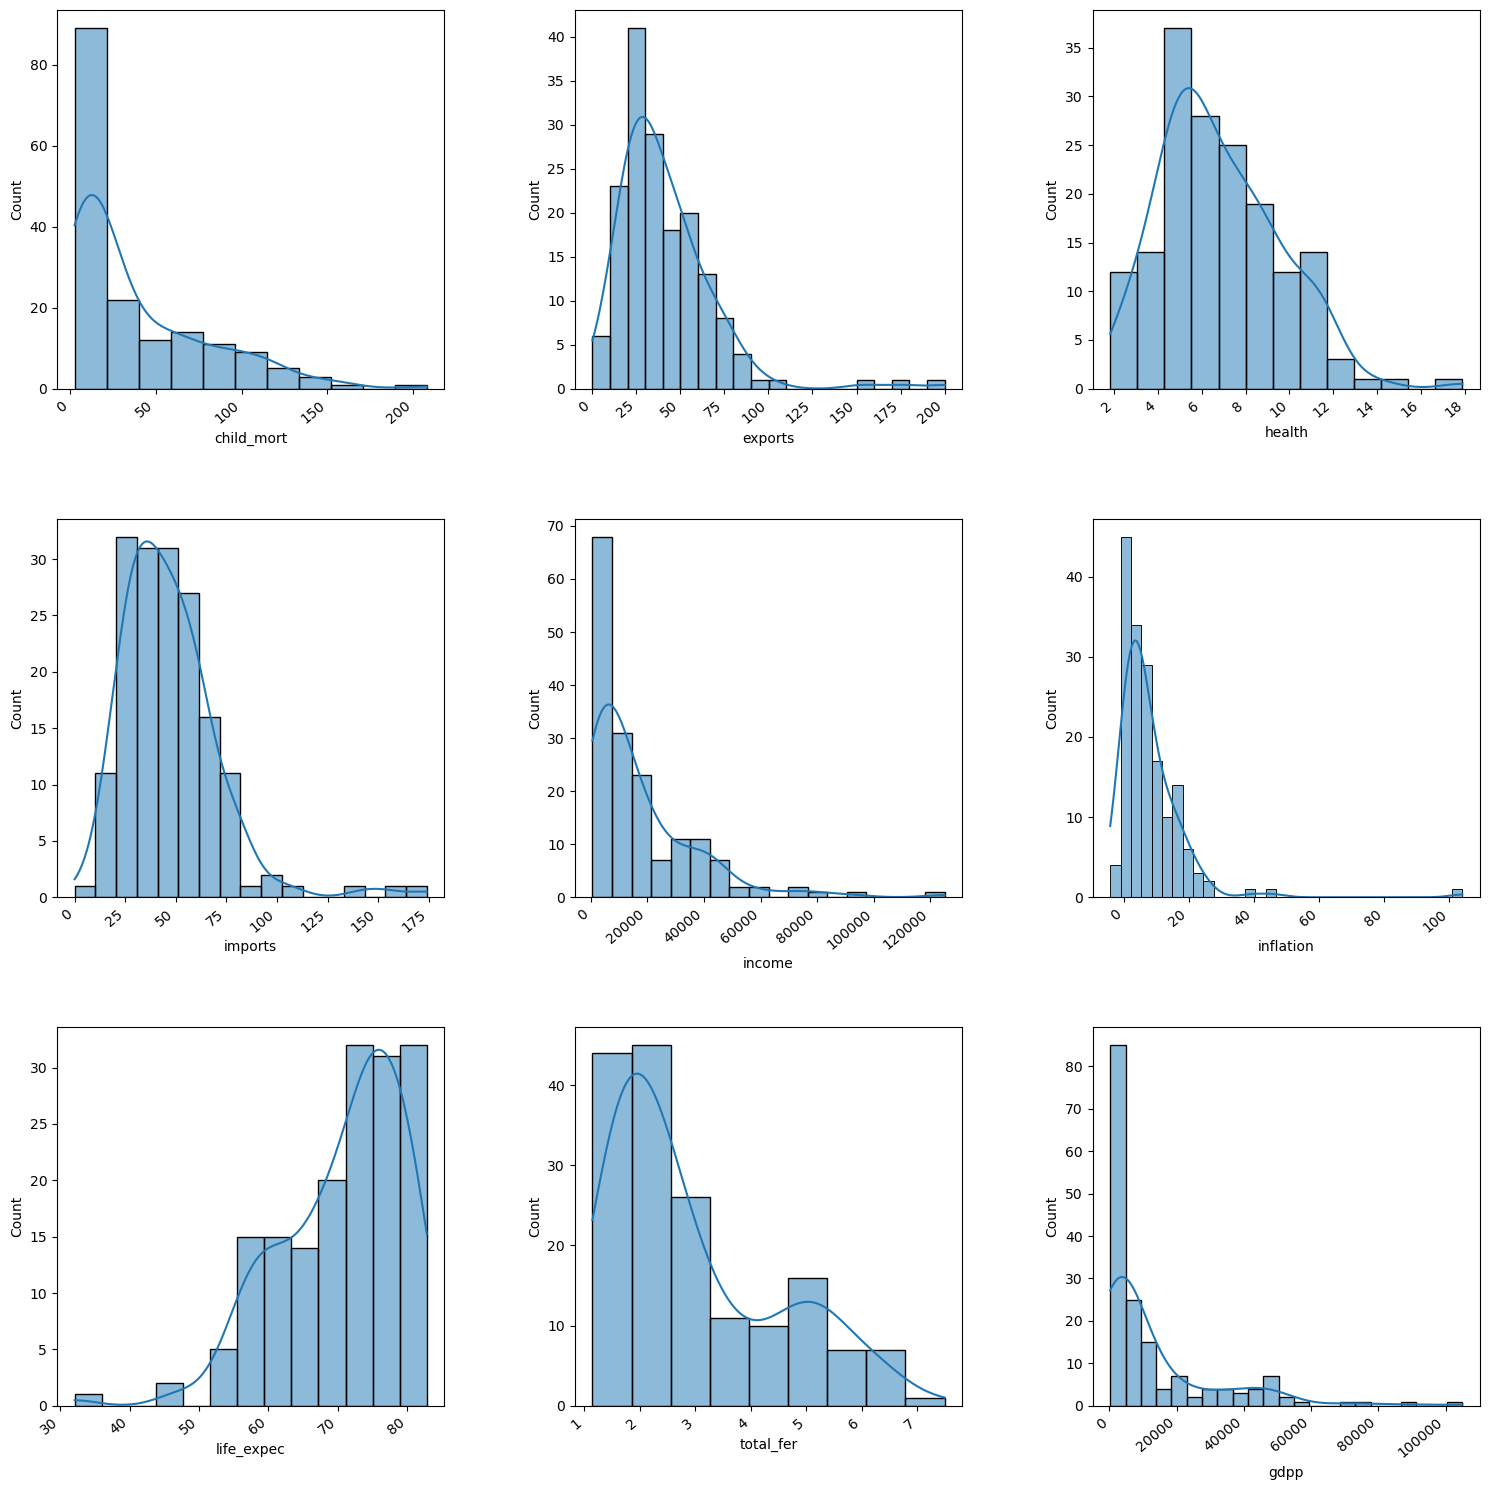

In [14]:
# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
ax = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(data[col], ax=ax[i], kde=True)
    ax[i].ticklabel_format(style='plain', axis='both')
    plt.setp(ax[i].get_xticklabels(), rotation=40, horizontalalignment='right')
fig.tight_layout(w_pad=6, h_pad=4)
plt.show()

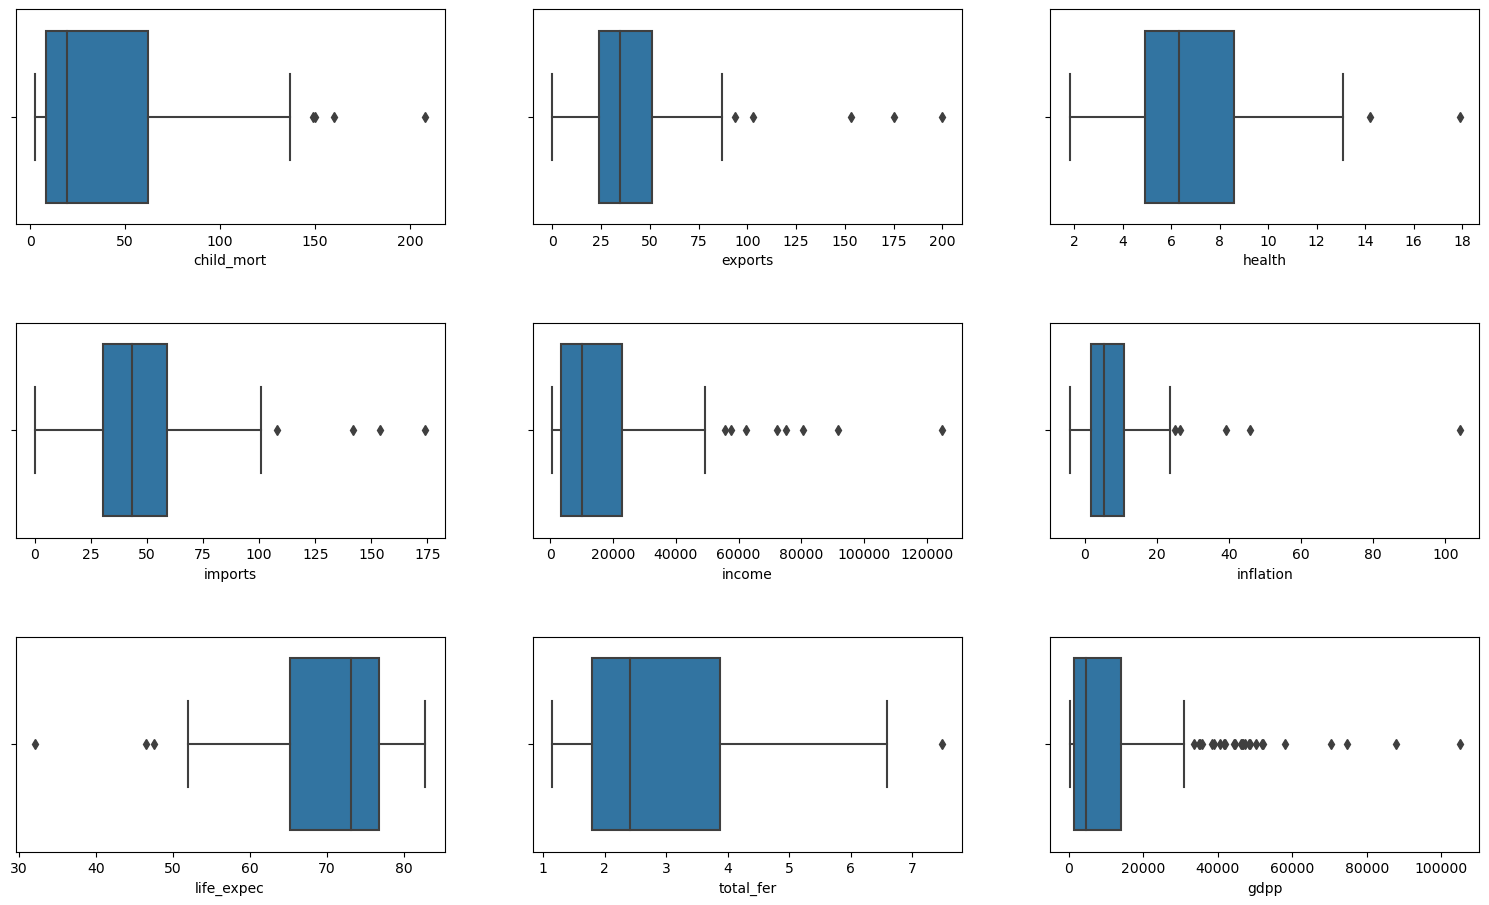

In [15]:
# Boxplots
fig = plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    fig.add_subplot(5, 3, i+1)
    sns.boxplot(x=data[col], data=data)
fig.tight_layout(w_pad=6, h_pad=4)
plt.show()    

Feature distributions observations:

* **Right (positively) skewed** features:
    * `child_mort`
    * `exports`
    * `import`
    * `income`
    * `inflation`
    * `total_fer`
    * `gdpp`


* **Left (negatively) skewed** features:
    * `life_expec`


* **Normally distributed** features:
    * `health`
    
While the data distribution plots show that some features do have outliers, we will not be removing them for the purposes of this analysis, since they may be important data points for deciding which countries have the most need for aid.

### <a class="anchor" id="section3.3">**3.3. Feature Plots**</a>
<hr>
Barplots of top 10 highest/lowest countries for each feature.
<hr>

* **High:** 
    * Child Mortality Rate
    * Total Fertility Rate
    * Inflation


* **Low:**
    * Exports
    * Imports
    * Health Spending
    * Income
    * Life Expectancy
    * GDP

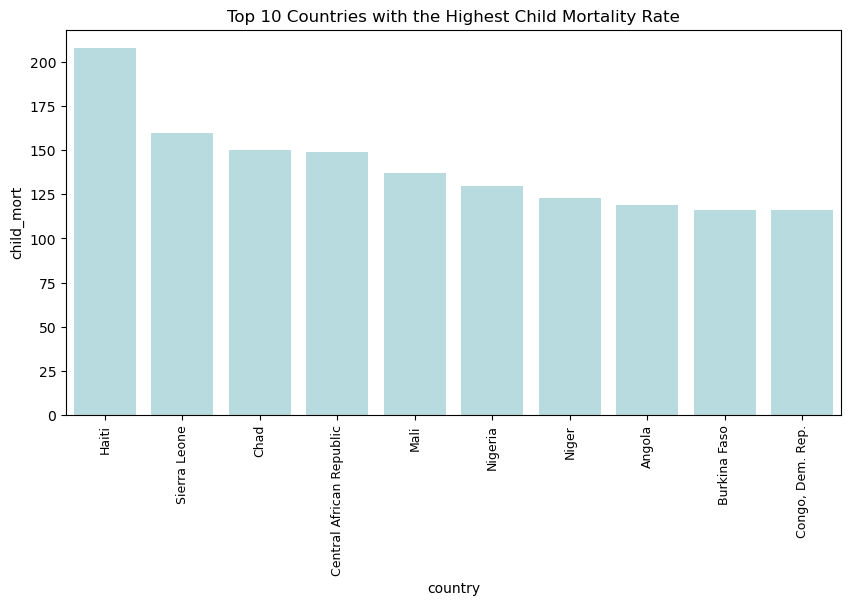

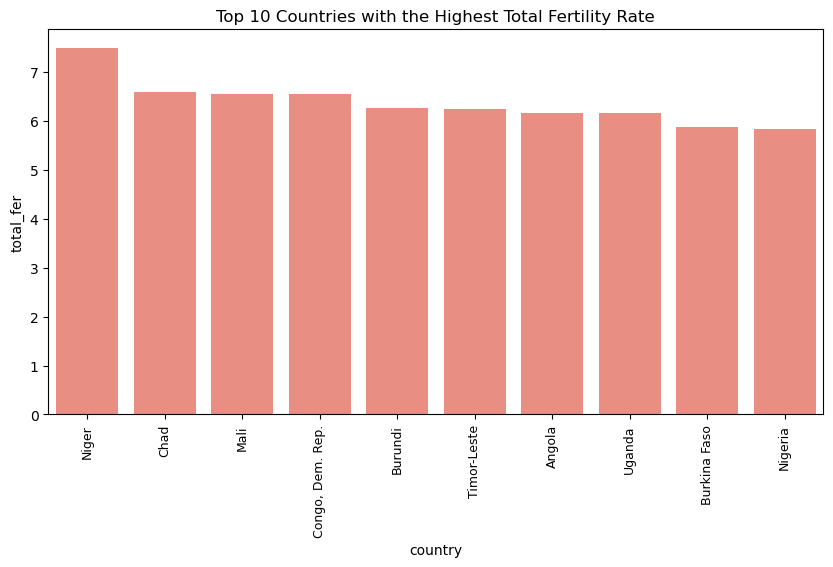

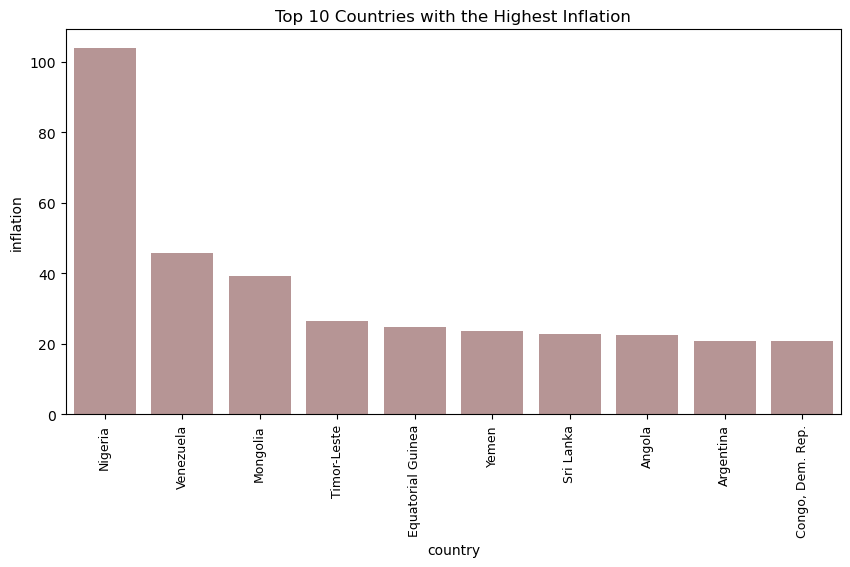

In [16]:
# Highest features
high_features = ['child_mort', 'total_fer', 'inflation']
high_features_label = ['Child Mortality Rate', 'Total Fertility Rate', 'Inflation']
colors = ['powderblue', 'salmon', 'rosybrown']

for i, j, k in zip(high_features, high_features_label, colors):
    plt.figure(figsize=(10, 5))
    plt.title ('Top 10 Countries with the Highest ' + j)
    sns.barplot(x = 'country', y = i,
            data = data.sort_values(ascending=False, by=i).iloc[:10],
            color=k)
    plt.xticks(fontsize=9, rotation=90)
plt.show()

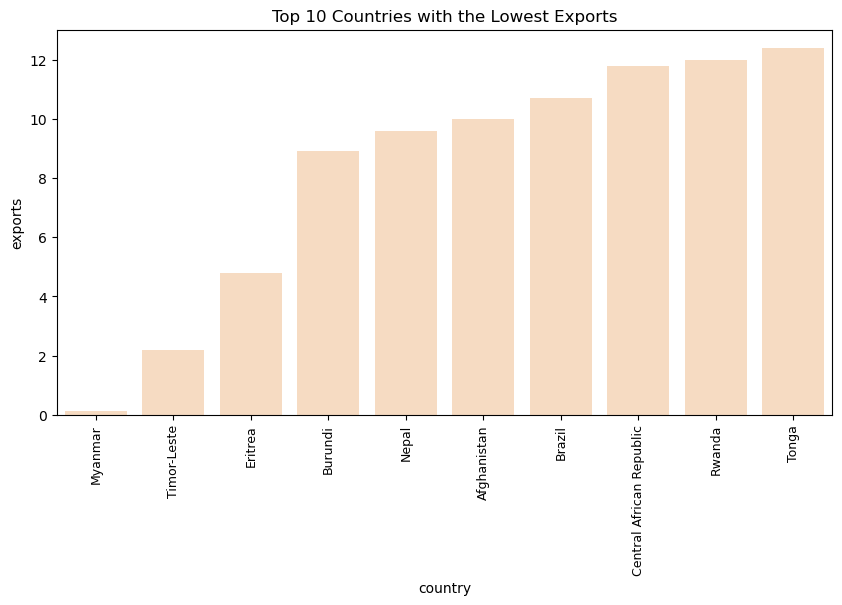

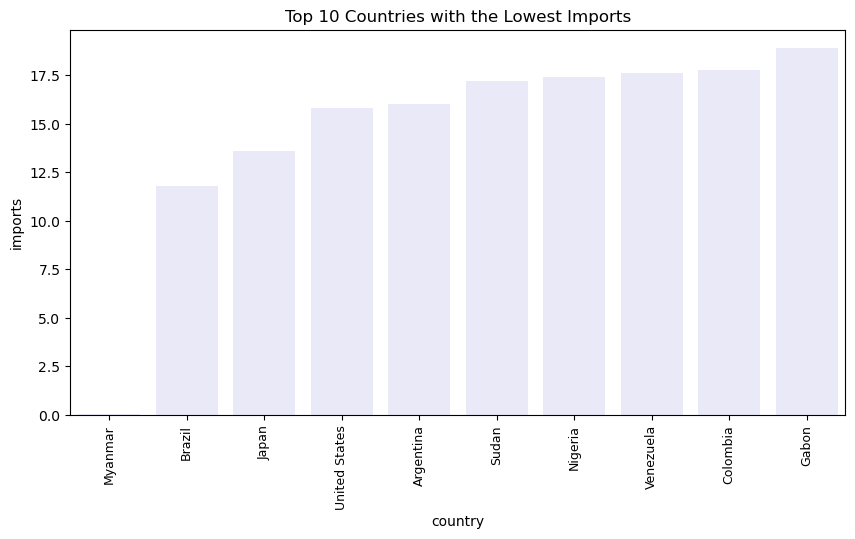

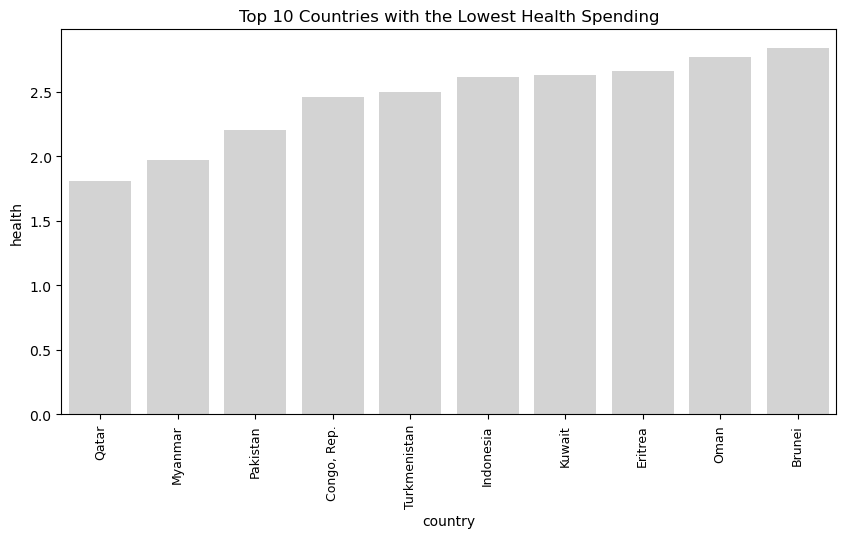

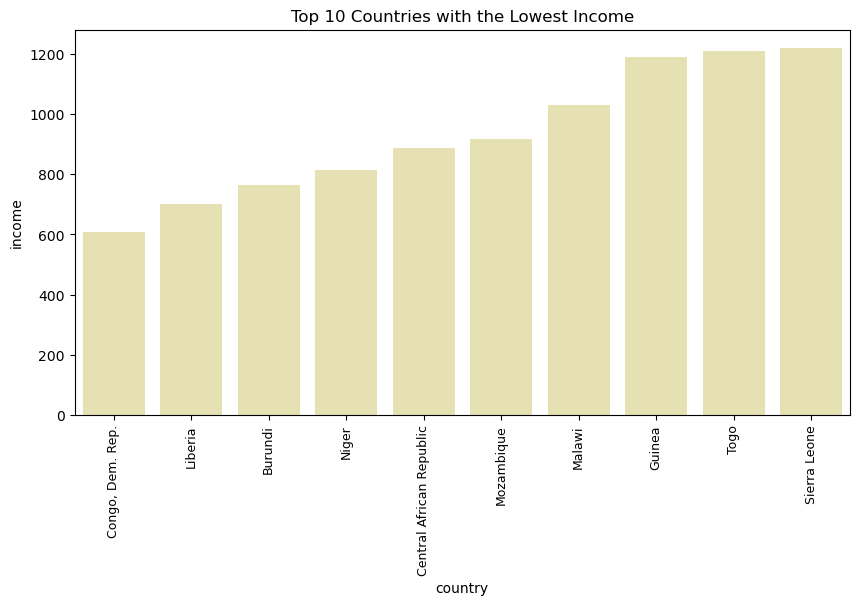

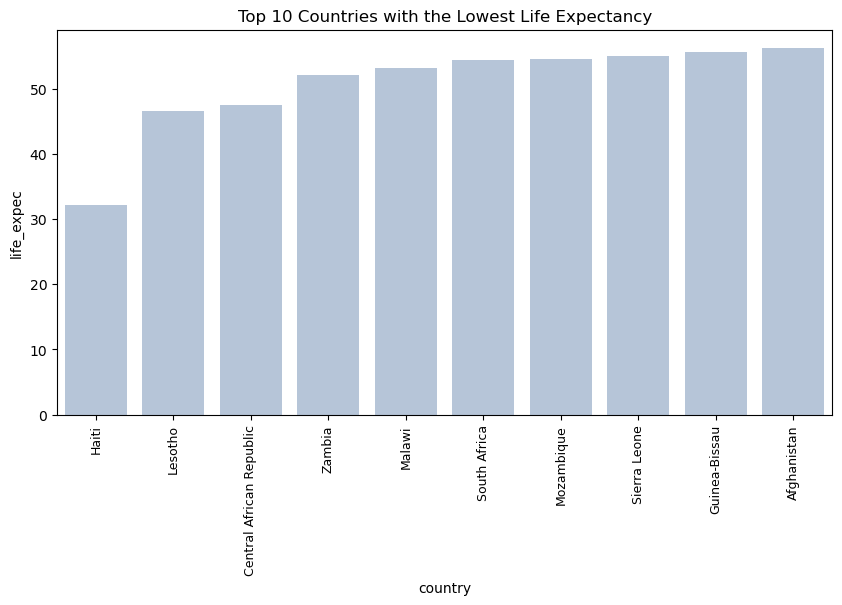

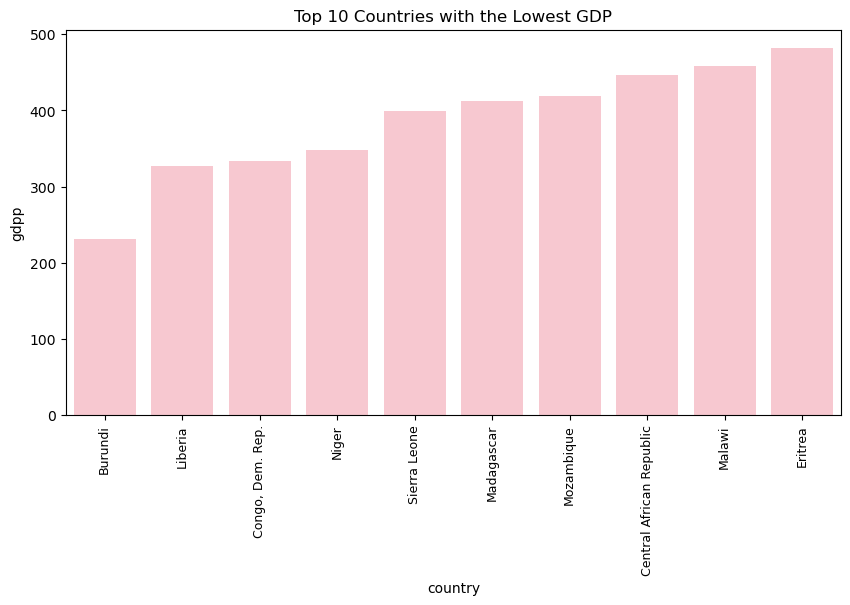

In [17]:
# Lowest features
low_features = ['exports', 'imports', 'health', 'income', 'life_expec', 'gdpp']
low_features_label = ['Exports', 'Imports', 'Health Spending', 'Income', 'Life Expectancy', 'GDP']
colors = ['peachpuff', 'lavender', 'lightgrey', 'palegoldenrod', 'lightsteelblue', 'pink']

for i, j, k in zip(low_features, low_features_label, colors):
    plt.figure(figsize=(10, 5))
    plt.title ('Top 10 Countries with the Lowest ' + j)
    sns.barplot(x = 'country', y = i,
            data = data.sort_values(ascending=True, by=i).iloc[:10],
            color=k)
    plt.xticks(fontsize=9, rotation=90)
plt.show()

## <a class="anchor" id="section4">**4. Data Evaluation and Reduction**</a>

### <a class="anchor" id="section4.1">**4.1. Correlations**</a>
<hr>

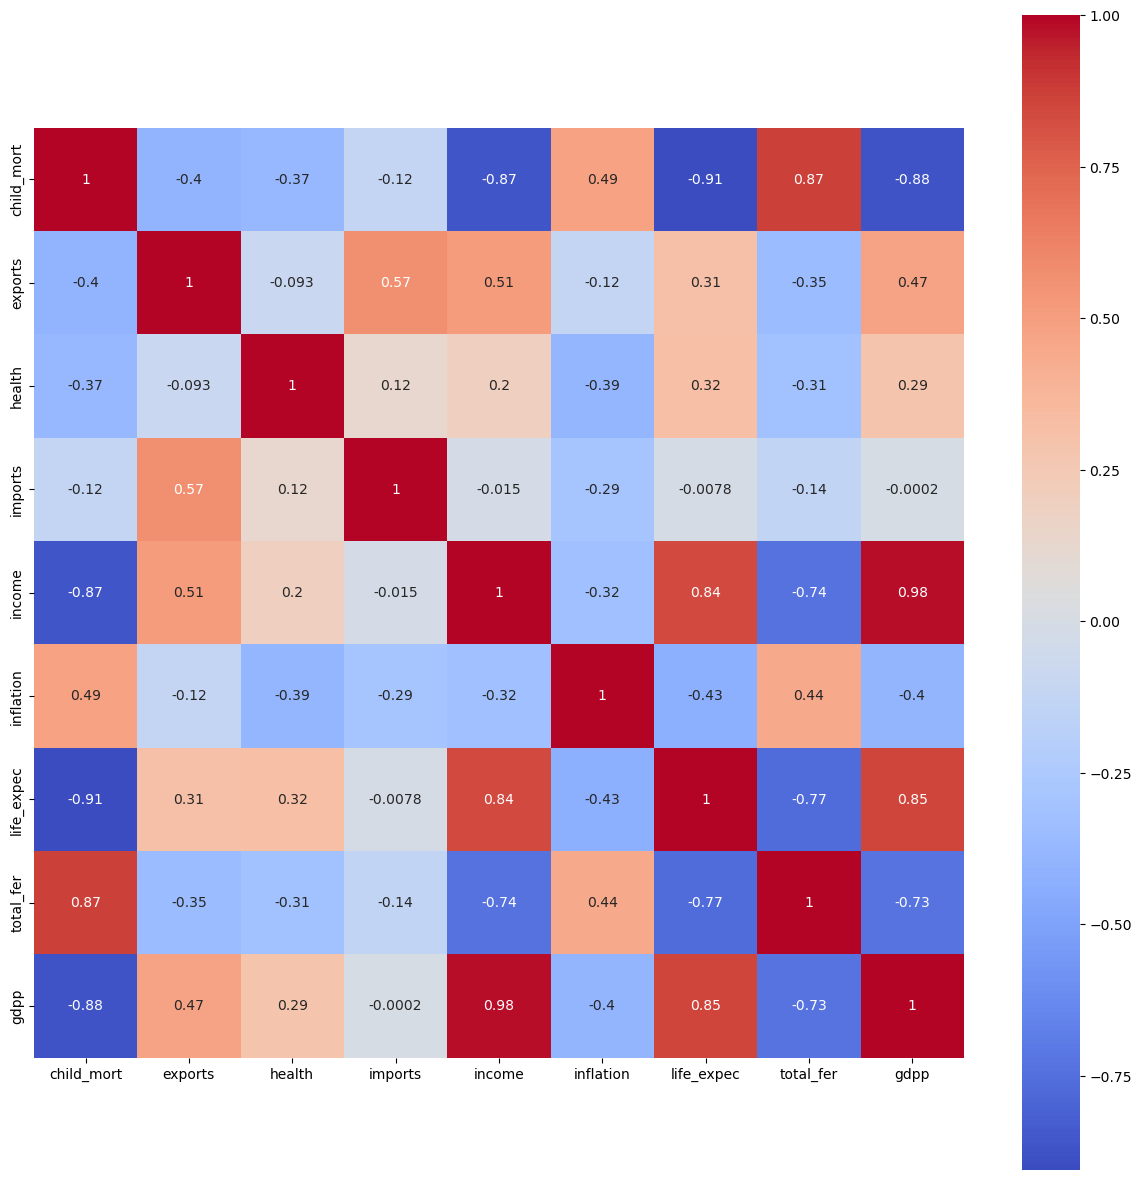

In [18]:
# Correlation plot
corrs = data[features].corr(method='spearman')
plt.figure(figsize=(15, 15))
sns.heatmap(corrs, square=True, cmap='coolwarm', annot=True);

The following features may be considered for elimination due to their high correlation (r > 0.85):
* `total_fer` & `child_mort`
* `gdpp` & `income`
* `gdpp` & `life_expec`

### <a class="anchor" id="section4.2">**4.2. Scaling**</a>
<hr>
Scaling allows us to compare features with incomparable units. Scaling also helps balance the impact of all features on the distance calculation and can help improve the performance of the model by removing potential bias.
<hr>

In [19]:
# Standardize (scale) features
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data.drop(data.columns[0], axis=1))
data_scaled = pd.DataFrame(data=data_scaled, columns=data.drop(data.columns[0], axis=1).columns)

data_scaled

child_mort  exports  health  imports  income  inflation  life_expec  \
0          1.29    -1.14    0.28    -0.08   -0.81       0.16       -1.62   
1         -0.54    -0.48   -0.10     0.07   -0.38      -0.31        0.65   
2         -0.27    -0.10   -0.97    -0.64   -0.22       0.79        0.67   
3          2.01     0.78   -1.45    -0.17   -0.59       1.39       -1.18   
4         -0.70     0.16   -0.29     0.50    0.10      -0.60        0.70   
..          ...      ...     ...      ...     ...        ...         ...   
162       -0.23     0.20   -0.57     0.24   -0.74      -0.49       -0.85   
163       -0.53    -0.46   -0.70    -1.21   -0.03       3.62        0.55   
164       -0.37     1.13    0.01     1.38   -0.66       0.41        0.29   
165        0.45    -0.41   -0.60    -0.52   -0.66       1.50       -0.34   
166        1.11    -0.15   -0.34    -0.66   -0.72       0.59       -2.09   

     total_fer  gdpp  
0         1.90 -0.68  
1        -0.86 -0.49  
2        -0.04 -0.47  
3         2.13 -0.52  
4        -0.54 -0.04  
..         ...   ...  
162       0.37 -0.55  
163      -0.32  0.03  
164      -0.66 -0.64  
165       1.14 -0.64  
166       1.62 -0.63  

[167 rows x 9 columns]

### <a class="anchor" id="section4.3">**4.3. Principal Component Analysis (PCA)**</a>
<hr>
PCA is a technique for reducing the dimensionality of large datasets by transforming a large set of variables into a smaller one, while preserving as much information as possible. Dimensionality reduction allows us to reduce the number of random variables under consideration, by obtaining a set of principal variables.
<hr>

In [20]:
# Fit and transform
pca = PCA()
pca.fit(data_scaled)
pca_data = pca.transform(data_scaled)

In [21]:
n_pcs = pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [features[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
pd.DataFrame(dic.items())

0           1
0  PC0  life_expec
1  PC1     imports
2  PC2   inflation
3  PC3        gdpp
4  PC4   inflation
5  PC5   total_fer
6  PC6     exports
7  PC7  child_mort
8  PC8        gdpp

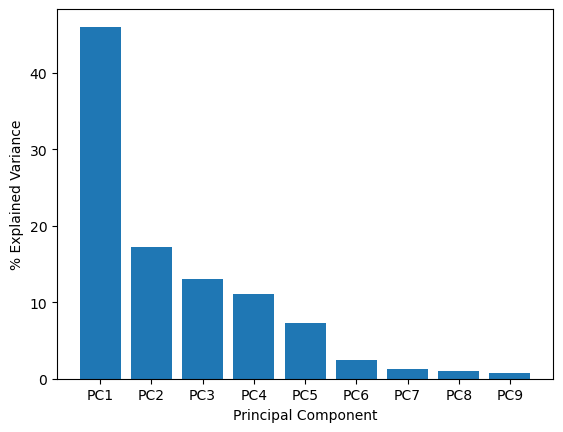

In [22]:
# Percentage of variance explained
var_exp = np.round(pca.explained_variance_ratio_*100, decimals =1)

# Plot the percentage of explained variance by principal component
plt.bar(x=range(1, len(var_exp)+1), height=var_exp, 
        tick_label = ['PC' + str(x) for x in range (1, len(var_exp)+1)])
plt.xlabel('Principal Component')
plt.ylabel('% Explained Variance');

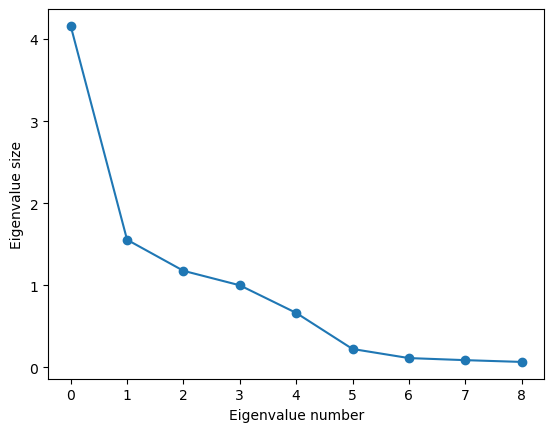

In [23]:
# Scree plot
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size");

I will be using Kaiser's rule for selecting principal components. Kaiser's rule states that the components with eigenvalues greater than 1 should be kept for statistical inference, because any principal component retained should explain the variance at least as much as an original standardized variable.

Based on the plots above, I will be selecting **4 Principal Components**.

In [24]:
# PC dataframe
pc_data = pd.DataFrame(pca_data, columns = ['PC' + str(x) for x in range (1, len(var_exp)+1)])
pc_data = pc_data.iloc[:, 0:4] # select PC1:PC4

pc_data

PC1   PC2   PC3   PC4
0   -2.91  0.10 -0.72  1.01
1    0.43 -0.59 -0.33 -1.16
2   -0.29 -0.46  1.22 -0.87
3   -2.93  1.70  1.53  0.84
4    1.03  0.14 -0.23 -0.85
..    ...   ...   ...   ...
162 -0.82  0.64 -0.39 -0.71
163 -0.55 -1.23  3.10 -0.12
164  0.50  1.39 -0.24 -1.07
165 -1.89 -0.11  1.11  0.06
166 -2.86  0.49  0.22  0.82

[167 rows x 4 columns]

In [25]:
# Cumalitive sum of explained variance for chosen PCs 
sum(var_exp[0:4])

87.3

The 4 chosen principal components explain 87.3% of the distribution of the original data.

In [26]:
# Get most important features on the chosen PCs
n_pcs = 4
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [features[most_important[i]] for i in range(n_pcs)]
most_important_dict = dict(zip(['PC{}'.format(i) for i in range(1, 5)], most_important_names))

[print(key,':',value) for key, value in most_important_dict.items()];

PC1 : life_expec
PC2 : imports
PC3 : inflation
PC4 : gdpp


## <a class="anchor" id="section5">**5. Model: K-Means Clustering**</a>
<hr>
K-Means clustering is an Unsupervised Learning algorithm, which groups unlabeled data into k different clusters of equal variance by their features, in such a way that each dataset belongs to only one group with similar properties. The K-Means clustering algorithm mainly performs two tasks:

1. Determines the best value for k center points (centroids) by an iterative process and;
2. Assigns each data point to its closest k-center. All data points near to the particular k-center create a cluster.
<hr>

In [27]:
kmeans_set = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':42}

<u>***Scaled Data***</u>

In [28]:
# Compute cluster centers and predict cluster index for each sample
km = KMeans(n_clusters = 3, **kmeans_set)
y_pred_scaled = km.fit_predict(data_scaled)
y_pred_scaled

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [29]:
# Add cluster column to scaled data
data_scaled['cluster'] = y_pred_scaled
data_scaled

child_mort  exports  health  imports  income  inflation  life_expec  \
0          1.29    -1.14    0.28    -0.08   -0.81       0.16       -1.62   
1         -0.54    -0.48   -0.10     0.07   -0.38      -0.31        0.65   
2         -0.27    -0.10   -0.97    -0.64   -0.22       0.79        0.67   
3          2.01     0.78   -1.45    -0.17   -0.59       1.39       -1.18   
4         -0.70     0.16   -0.29     0.50    0.10      -0.60        0.70   
..          ...      ...     ...      ...     ...        ...         ...   
162       -0.23     0.20   -0.57     0.24   -0.74      -0.49       -0.85   
163       -0.53    -0.46   -0.70    -1.21   -0.03       3.62        0.55   
164       -0.37     1.13    0.01     1.38   -0.66       0.41        0.29   
165        0.45    -0.41   -0.60    -0.52   -0.66       1.50       -0.34   
166        1.11    -0.15   -0.34    -0.66   -0.72       0.59       -2.09   

     total_fer  gdpp  cluster  
0         1.90 -0.68        1  
1        -0.86 -0.49        2  
2        -0.04 -0.47        2  
3         2.13 -0.52        1  
4        -0.54 -0.04        2  
..         ...   ...      ...  
162       0.37 -0.55        2  
163      -0.32  0.03        2  
164      -0.66 -0.64        2  
165       1.14 -0.64        1  
166       1.62 -0.63        1  

[167 rows x 10 columns]

In [30]:
# Inertia
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters = k, **kmeans_set)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

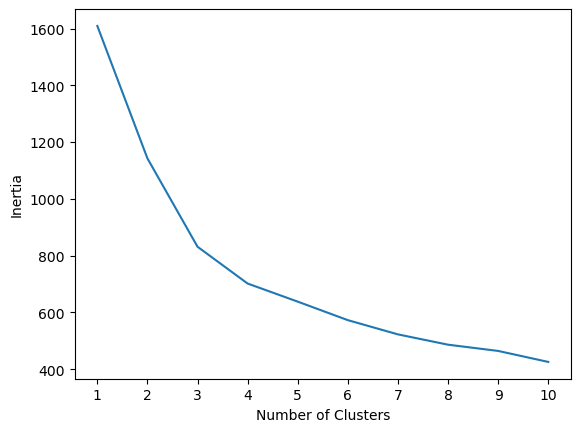

In [31]:
# Plot
k1 = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [32]:
# Optimal number of clusters
k1.elbow

3

<u>***PCA Data***</u>

In [33]:
# Compute cluster centers and predict cluster index for each sample
km = KMeans(n_clusters = 3, **kmeans_set)
y_pred_pca = km.fit_predict(pc_data)
y_pred_pca

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [34]:
# Create feature dataframe
feature_data = data[features]
feature_data

child_mort  exports  health  imports  income  inflation  life_expec  \
0         90.20    10.00    7.58    44.90    1610       9.44       56.20   
1         16.60    28.00    6.55    48.60    9930       4.49       76.30   
2         27.30    38.40    4.17    31.40   12900      16.10       76.50   
3        119.00    62.30    2.85    42.90    5900      22.40       60.10   
4         10.30    45.50    6.03    58.90   19100       1.44       76.80   
..          ...      ...     ...      ...     ...        ...         ...   
162       29.20    46.60    5.25    52.70    2950       2.62       63.00   
163       17.10    28.50    4.91    17.60   16500      45.90       75.40   
164       23.30    72.00    6.84    80.20    4490      12.10       73.10   
165       56.30    30.00    5.18    34.40    4480      23.60       67.50   
166       83.10    37.00    5.89    30.90    3280      14.00       52.00   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [35]:
# Add cluster column to feature dataframe
feature_data['cluster'] = y_pred_pca
feature_data

child_mort  exports  health  imports  income  inflation  life_expec  \
0         90.20    10.00    7.58    44.90    1610       9.44       56.20   
1         16.60    28.00    6.55    48.60    9930       4.49       76.30   
2         27.30    38.40    4.17    31.40   12900      16.10       76.50   
3        119.00    62.30    2.85    42.90    5900      22.40       60.10   
4         10.30    45.50    6.03    58.90   19100       1.44       76.80   
..          ...      ...     ...      ...     ...        ...         ...   
162       29.20    46.60    5.25    52.70    2950       2.62       63.00   
163       17.10    28.50    4.91    17.60   16500      45.90       75.40   
164       23.30    72.00    6.84    80.20    4490      12.10       73.10   
165       56.30    30.00    5.18    34.40    4480      23.60       67.50   
166       83.10    37.00    5.89    30.90    3280      14.00       52.00   

     total_fer   gdpp  cluster  
0         5.82    553        2  
1         1.65   4090        1  
2         2.89   4460        1  
3         6.16   3530        2  
4         2.13  12200        1  
..         ...    ...      ...  
162       3.50   2970        1  
163       2.47  13500        1  
164       1.95   1310        1  
165       4.67   1310        2  
166       5.40   1460        2  

[167 rows x 10 columns]

In [36]:
# Inertia
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters = k, **kmeans_set)
    km.fit(feature_data)
    inertia.append(km.inertia_)

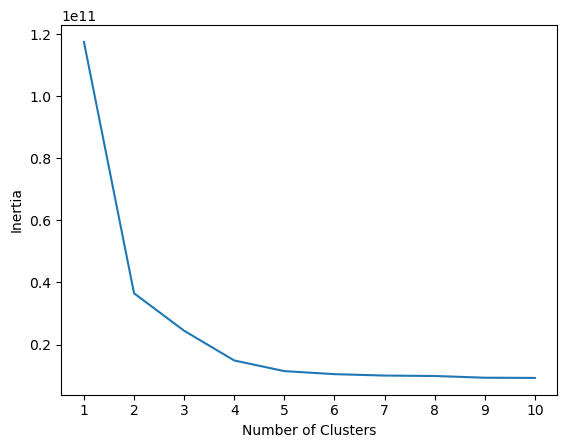

In [37]:
# Plot
k1 = KneeLocator(range(1, 11), inertia, curve='convex', direction='decreasing')
plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [38]:
# Optimal number of clusters
k1.elbow

3

The K-Means model, run on both the standardised data and the PCA 4-component data, shows that the **optimal number of clusters is 3**.

In [39]:
feature_data.drop('cluster', axis=1)

child_mort  exports  health  imports  income  inflation  life_expec  \
0         90.20    10.00    7.58    44.90    1610       9.44       56.20   
1         16.60    28.00    6.55    48.60    9930       4.49       76.30   
2         27.30    38.40    4.17    31.40   12900      16.10       76.50   
3        119.00    62.30    2.85    42.90    5900      22.40       60.10   
4         10.30    45.50    6.03    58.90   19100       1.44       76.80   
..          ...      ...     ...      ...     ...        ...         ...   
162       29.20    46.60    5.25    52.70    2950       2.62       63.00   
163       17.10    28.50    4.91    17.60   16500      45.90       75.40   
164       23.30    72.00    6.84    80.20    4490      12.10       73.10   
165       56.30    30.00    5.18    34.40    4480      23.60       67.50   
166       83.10    37.00    5.89    30.90    3280      14.00       52.00   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

In [40]:
feature_data2 = data[features]

In [41]:
km = KMeans(n_clusters = 3, **kmeans_set)
y_pred = km.fit_predict(feature_data2)
y_pred

array([0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0], dtype=int32)

## <a class="anchor" id="section6">**6. Cluster Analysis**</a>

### <a class="anchor" id="section6.1">**6.1. Cluster Plots**</a>
<hr>

<u>***Scaled Data***</u>

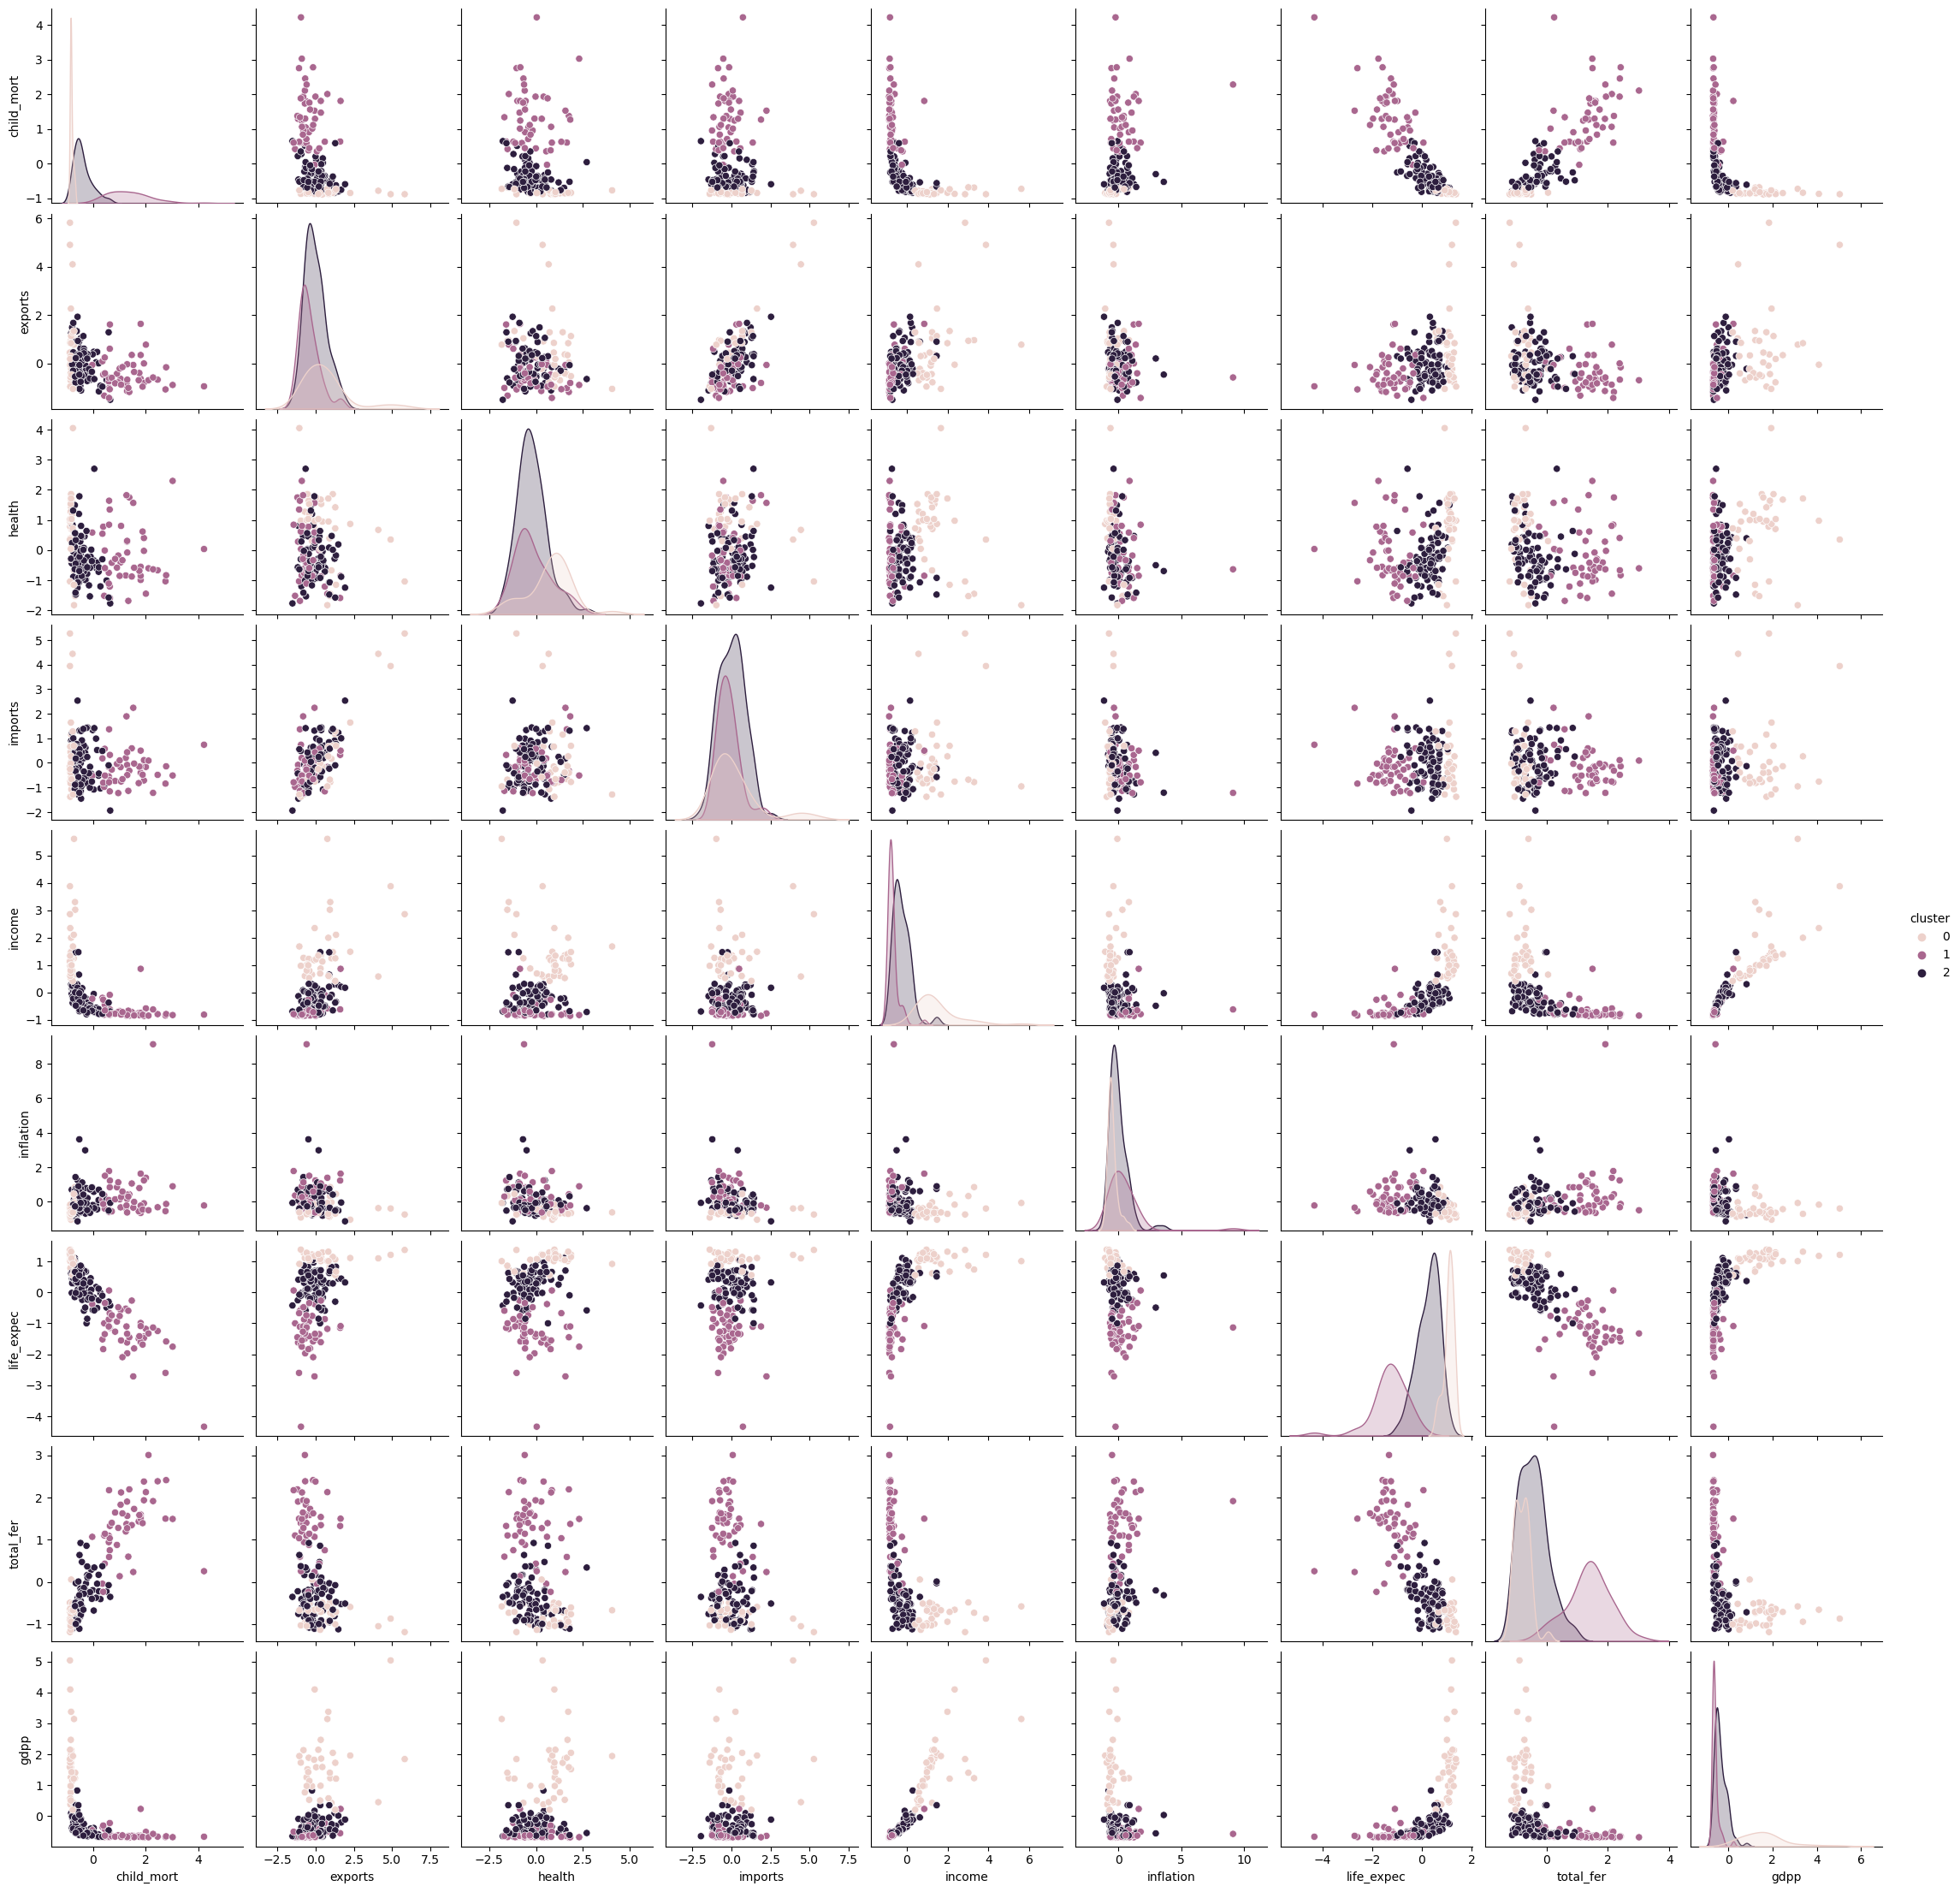

In [42]:
# Pairplot of clusters by feature
sns.pairplot(data_scaled, hue='cluster');

<u>***PCA Data***</u>

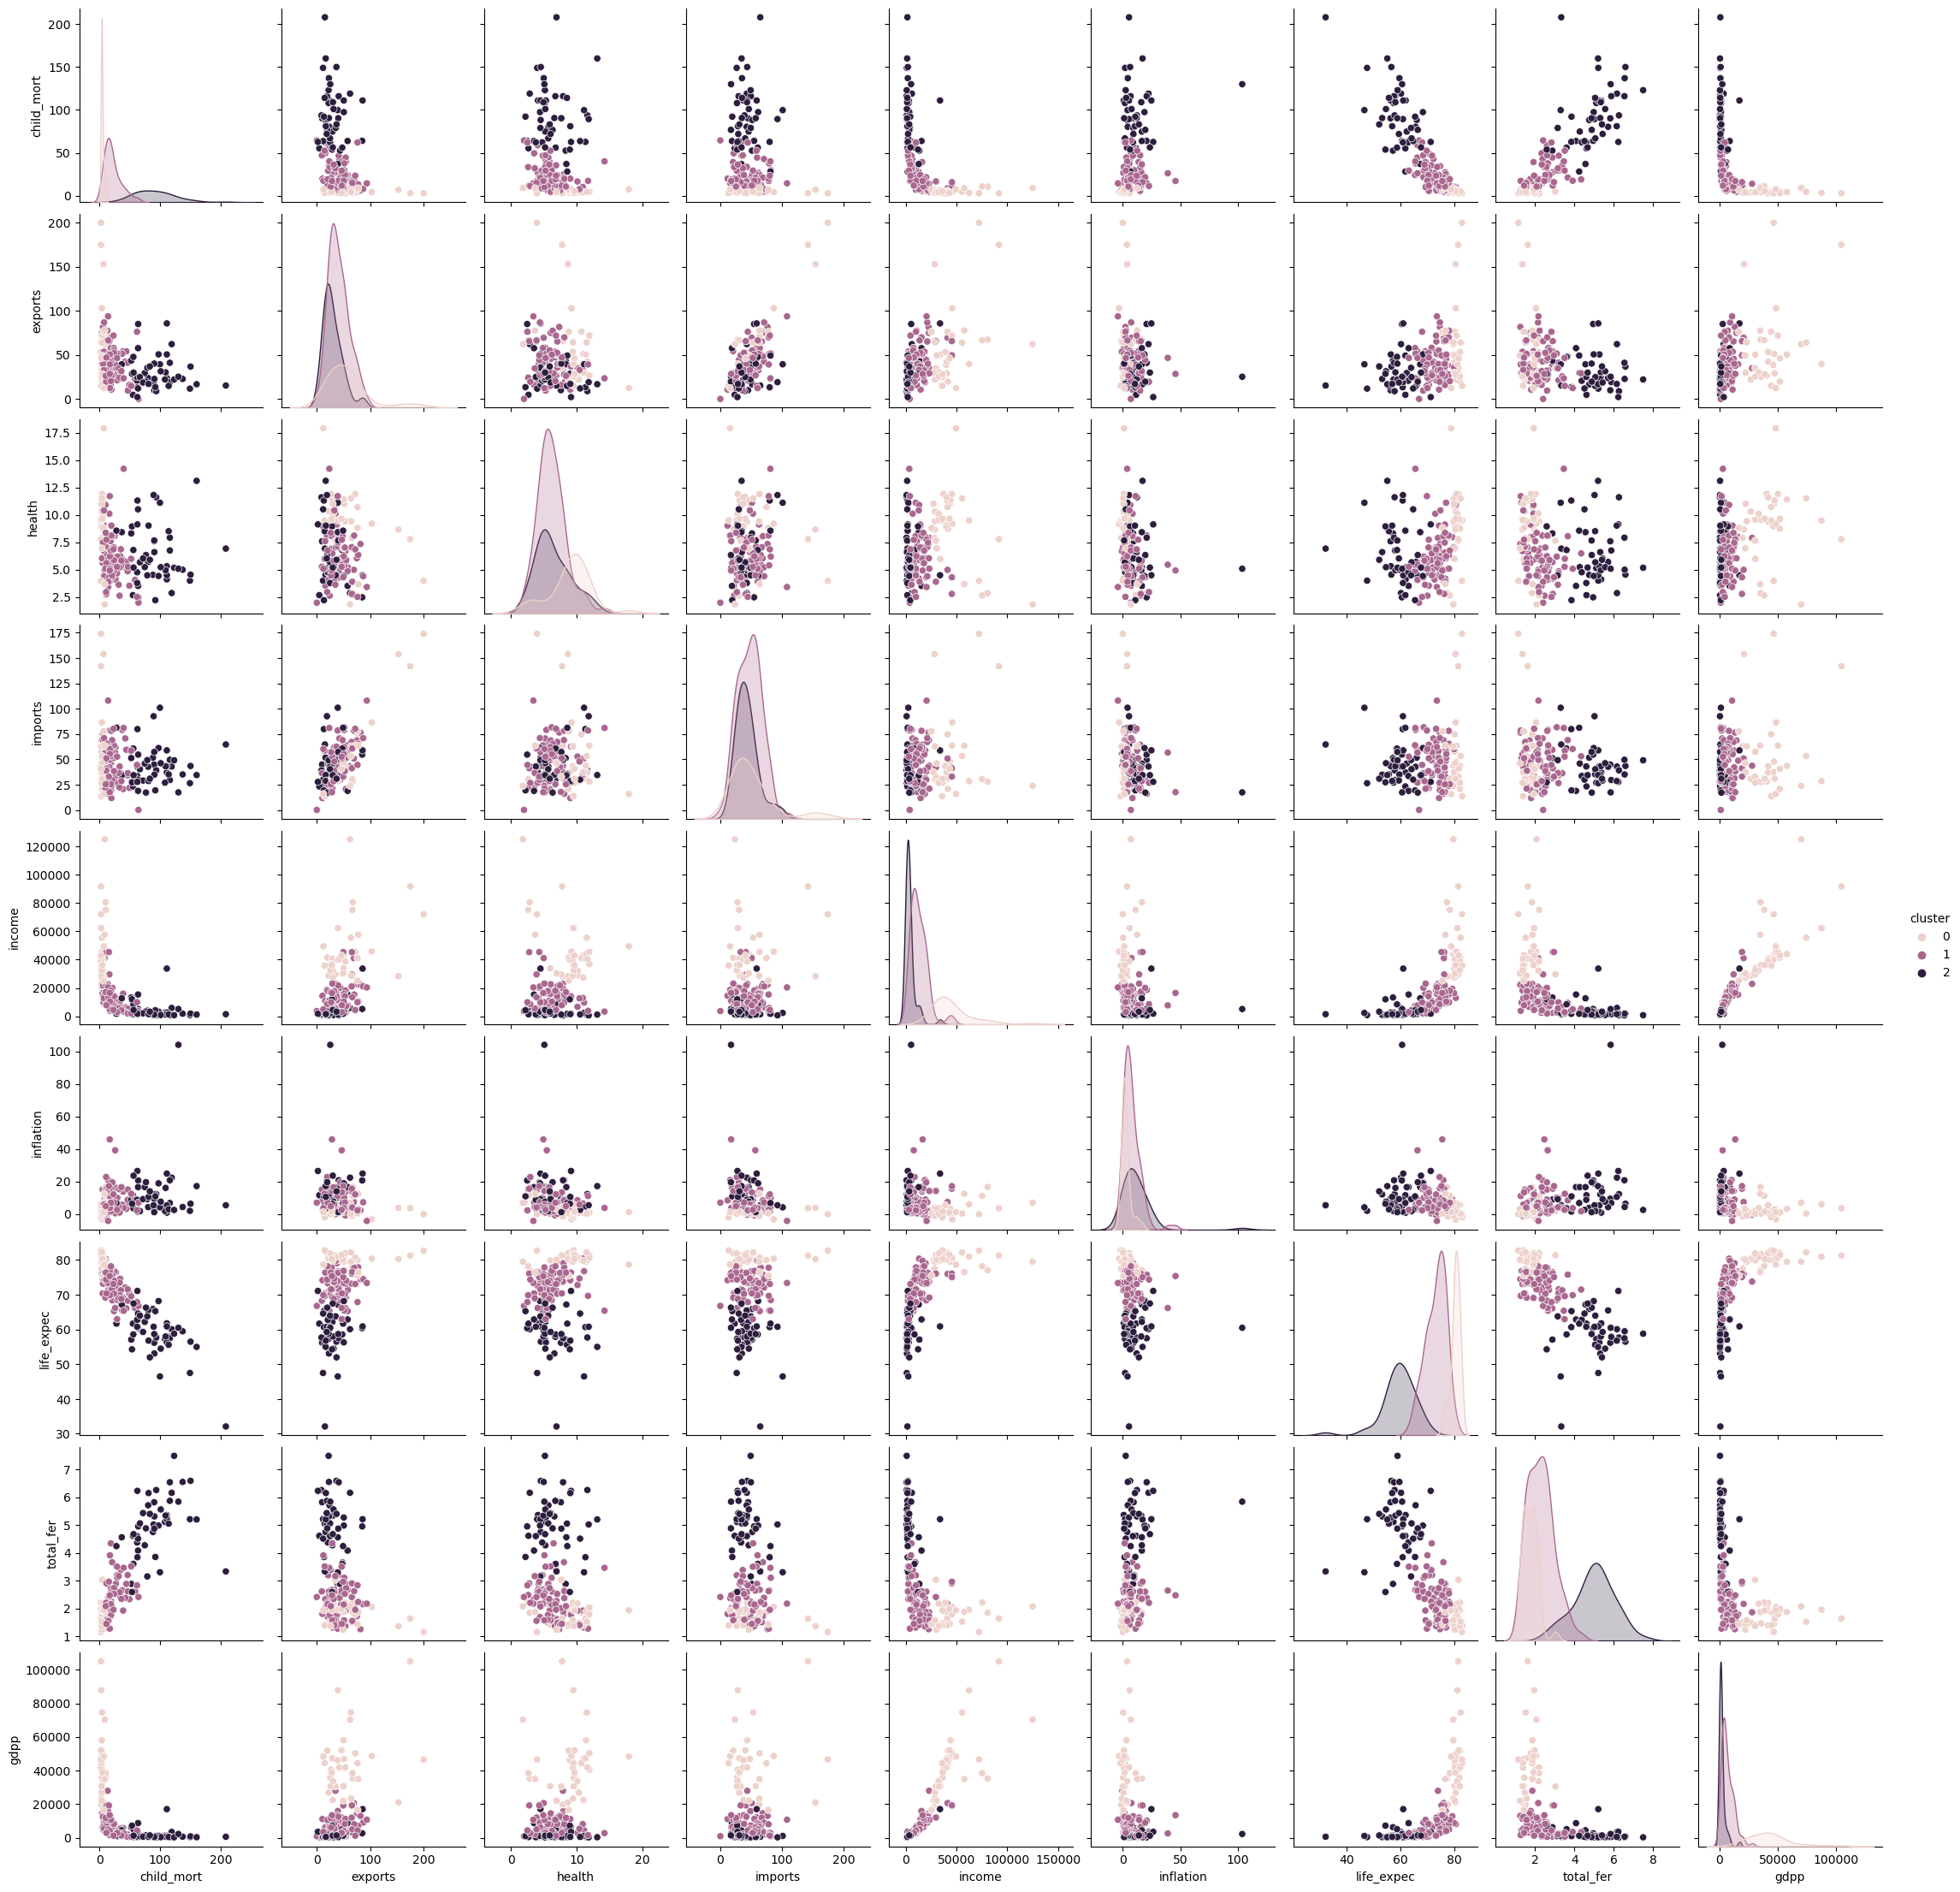

In [43]:
sns.pairplot(feature_data, hue='cluster');

### <a class="anchor" id="section6.2">**6.2. Cluster Characteristics**</a>
<hr>

In [44]:
# Add cluster column to original data
data['cluster'] = y_pred_scaled.tolist()
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan       90.20    10.00    7.58    44.90    1610   
1                Albania       16.60    28.00    6.55    48.60    9930   
2                Algeria       27.30    38.40    4.17    31.40   12900   
3                 Angola      119.00    62.30    2.85    42.90    5900   
4    Antigua and Barbuda       10.30    45.50    6.03    58.90   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu       29.20    46.60    5.25    52.70    2950   
163            Venezuela       17.10    28.50    4.91    17.60   16500   
164              Vietnam       23.30    72.00    6.84    80.20    4490   
165                Yemen       56.30    30.00    5.18    34.40    4480   
166               Zambia       83.10    37.00    5.89    30.90    3280   

     inflation  life_expec  total_fer   gdpp  cluster  
0         9.44       56.20       5.82    553        1  
1         4.49       76.30       1.65   4090        2  
2        16.10       76.50       2.89   4460        2  
3        22.40       60.10       6.16   3530        1  
4         1.44       76.80       2.13  12200        2  
..         ...         ...        ...    ...      ...  
162       2.62       63.00       3.50   2970        2  
163      45.90       75.40       2.47  13500        2  
164      12.10       73.10       1.95   1310        2  
165      23.60       67.50       4.67   1310        1  
166      14.00       52.00       5.40   1460        1  

[167 rows x 11 columns]

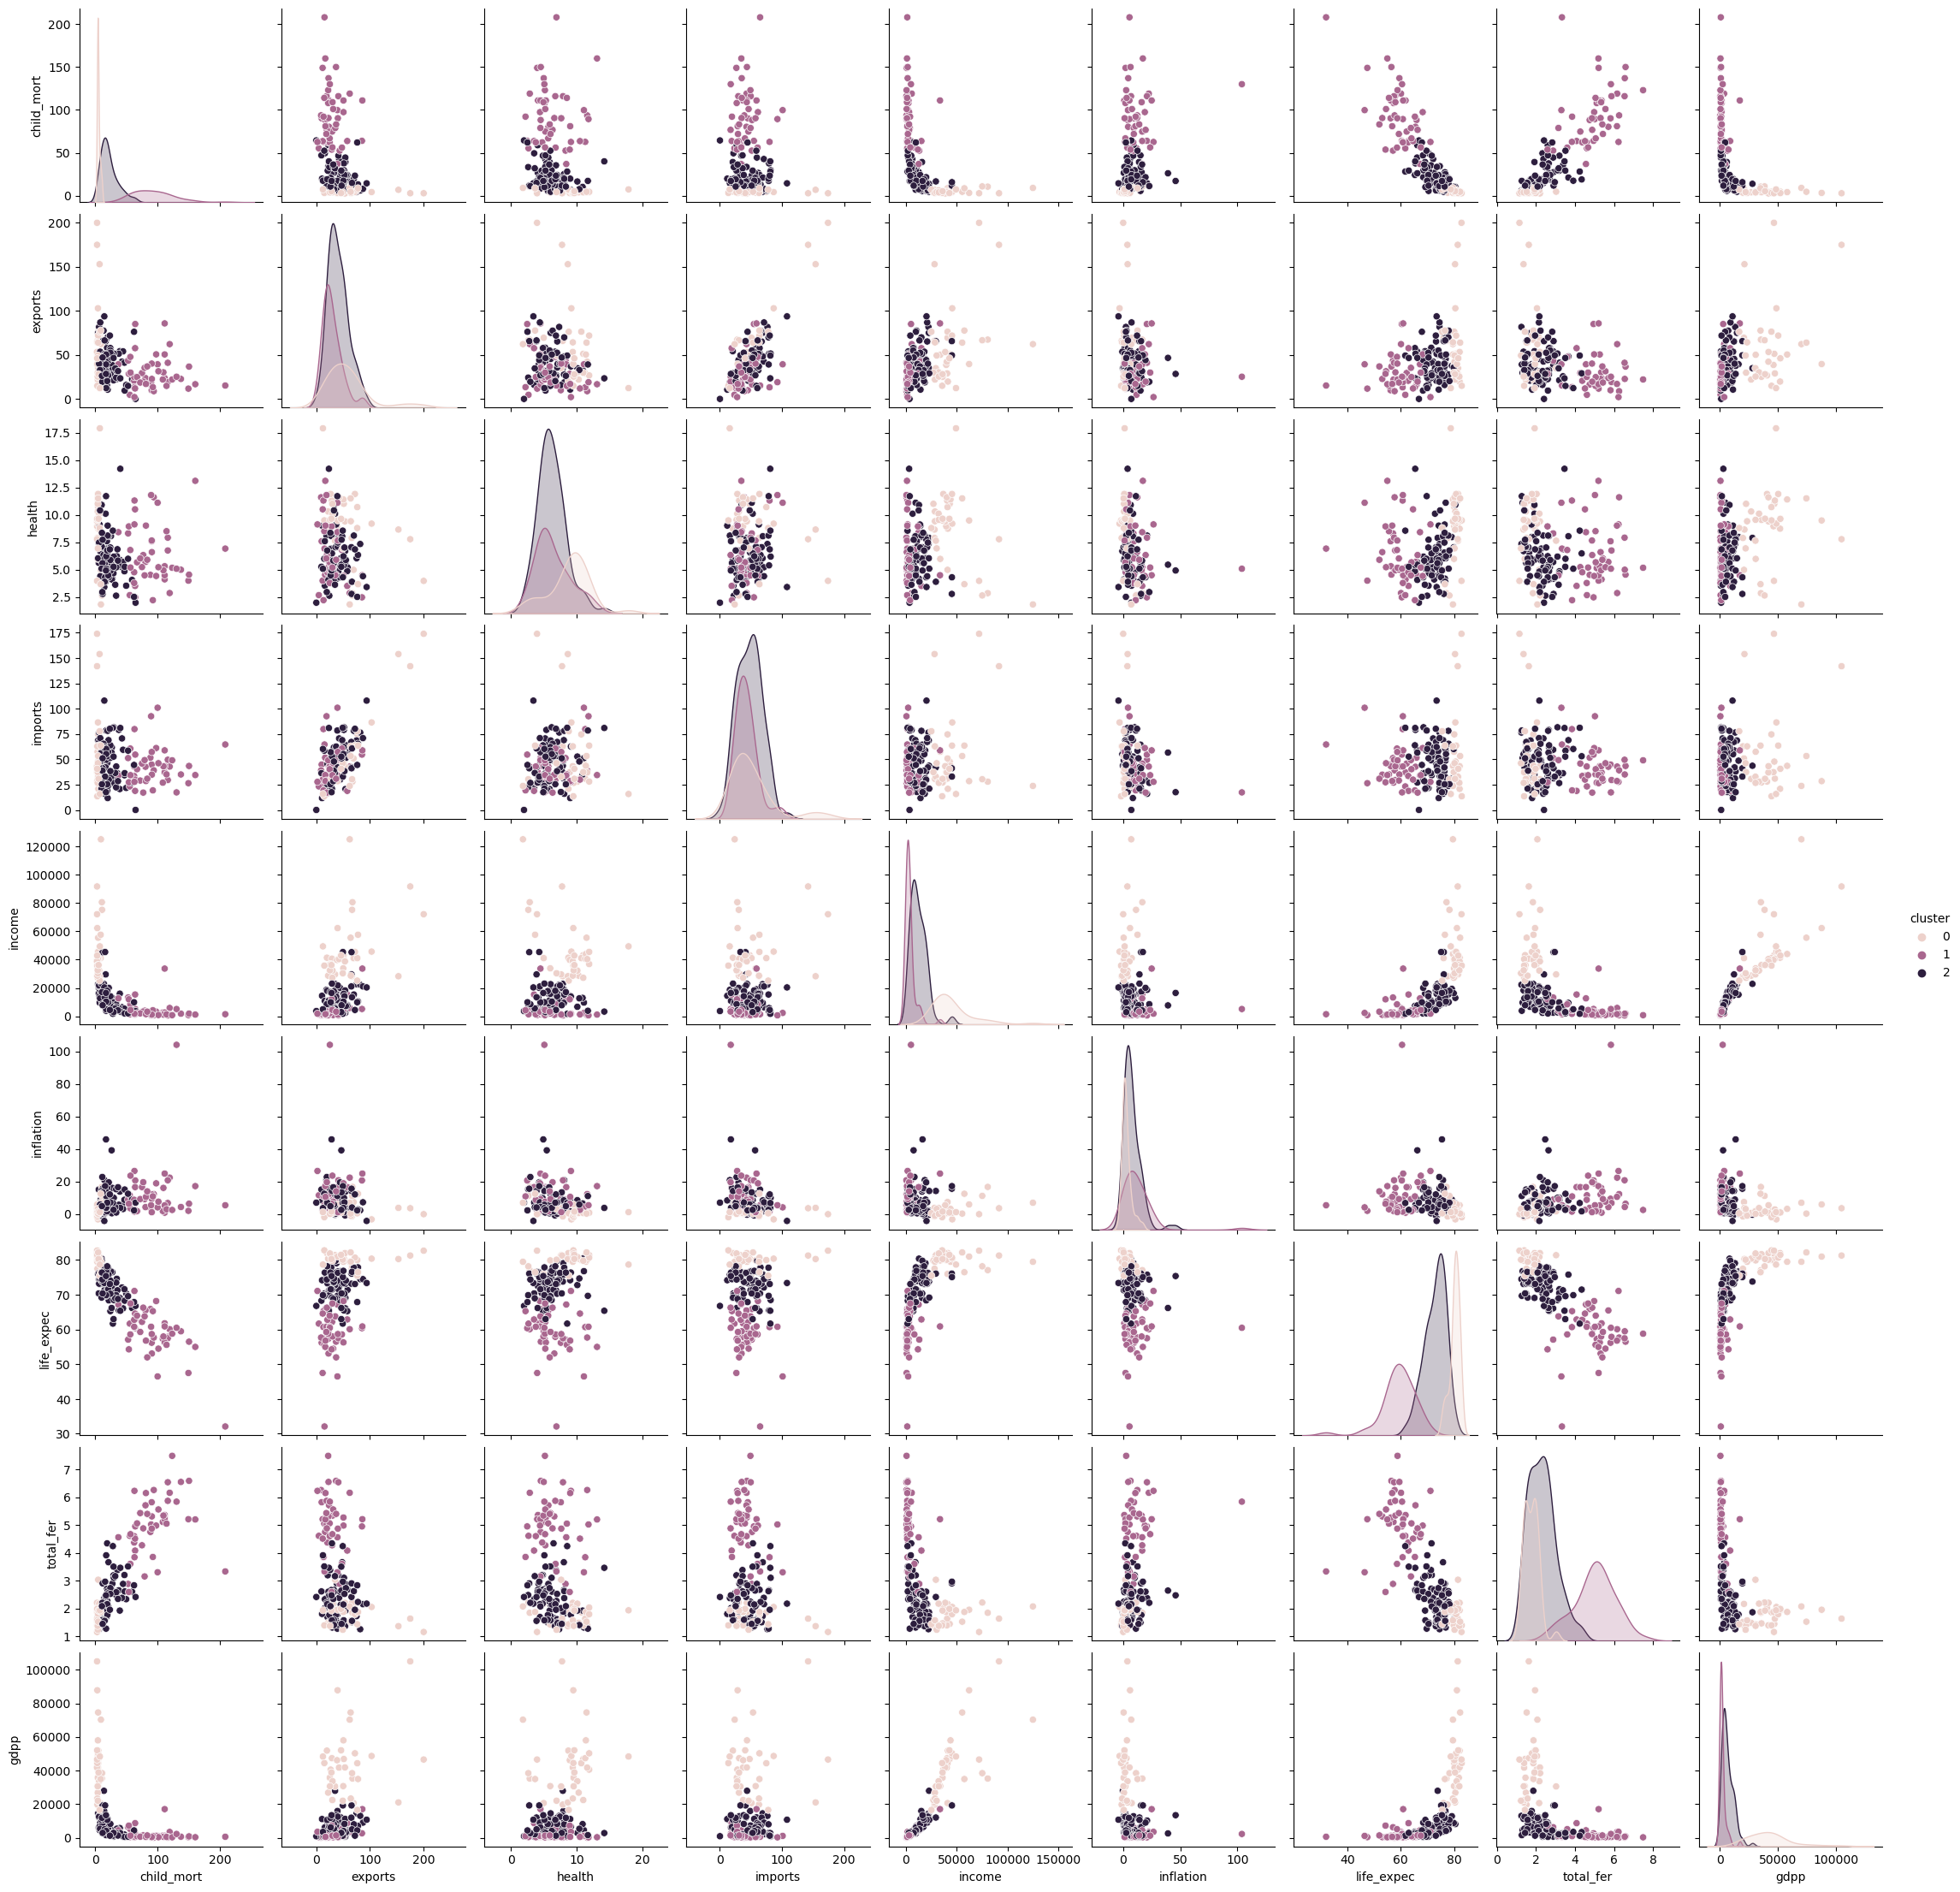

In [45]:
sns.pairplot(data, hue="cluster");

### <a class="anchor" id="section6.3">**6.3. Cluster Descriptions**</a>
<hr>

In [46]:
# Get mean values by cluster and feature
pt = pd.pivot_table(data.drop(['country'], axis=1), index=['cluster'])
pt

child_mort  exports     gdpp  health  imports   income  inflation  \
cluster                                                                      
0              5.00    58.74 42494.44    8.81    51.49 45672.22       2.67   
1             92.96    29.15  1922.38    6.39    42.32  3942.40      12.02   
2             21.93    40.24  6486.45    6.20    47.47 12305.60       7.60   

         life_expec  total_fer  
cluster                         
0             80.13       1.75  
1             59.19       5.01  
2             72.81       2.31

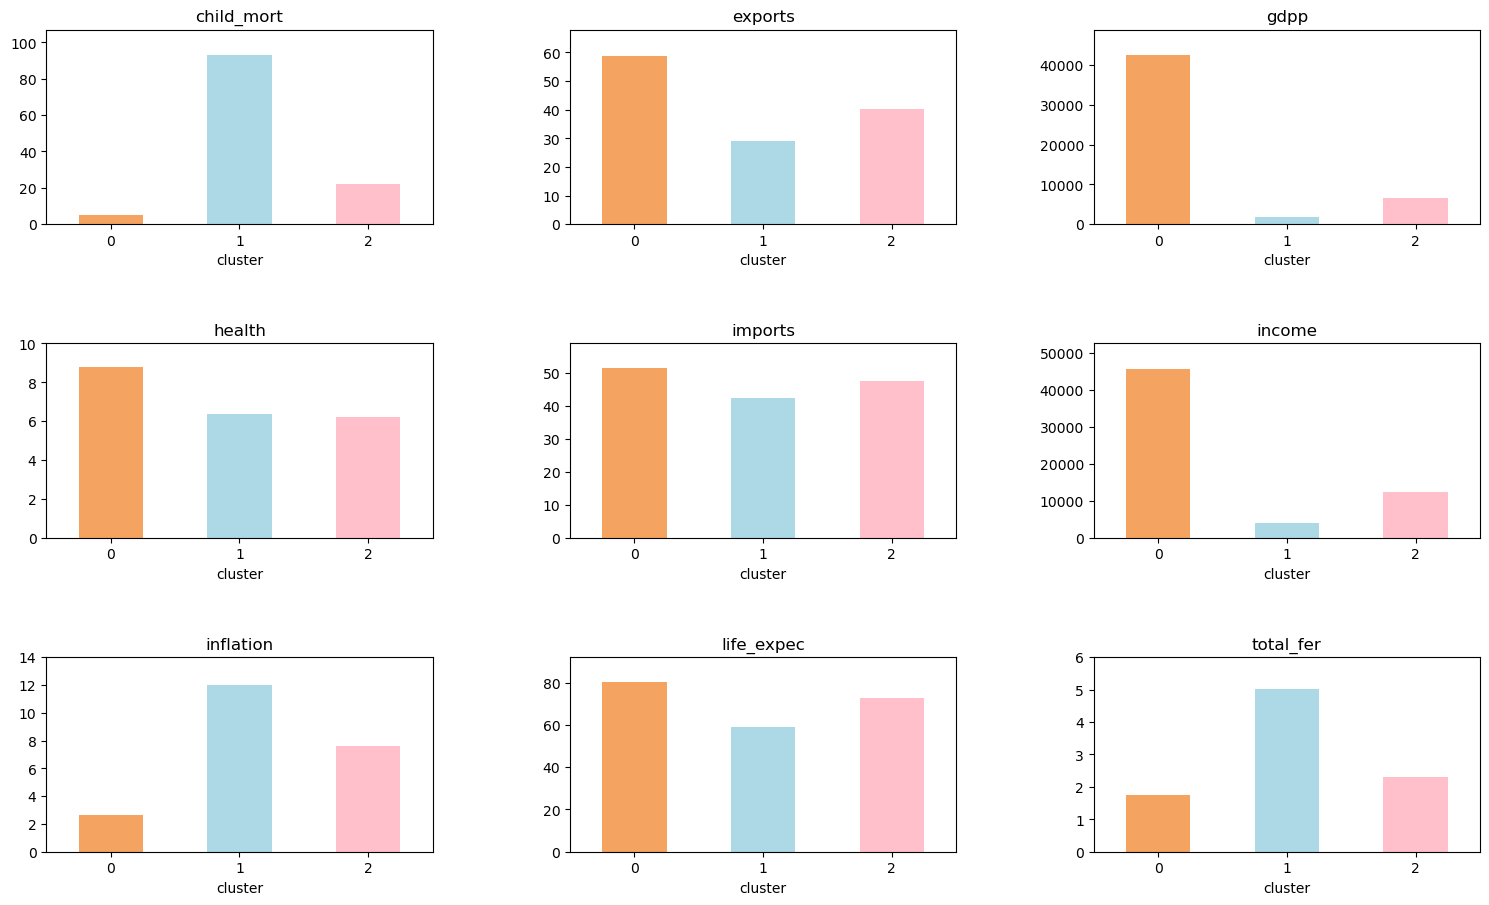

In [47]:
# Plot mean values by cluster and feature
fig = plt.figure(figsize=(15, 15))

for i, col in enumerate(list(pt.columns)):
    fig.add_subplot(5, 3, i+1)
    pt[col].plot(kind='bar', color=['sandybrown', 'lightblue', 'pink'])
    plt.title(col)
    plt.xticks(rotation=0)
    plt.ylim(0, round(1.15*max(pt[col])))
fig.tight_layout(w_pad=6, h_pad=4)
plt.show()

## <a class="anchor" id="section7">**7. Results**</a>
<hr>

`Cluster 0: Best Outcomes`

In [48]:
# Countries in Cluster 0
countries_0 = data.loc[data['cluster'] == 0].country.unique()
print(countries_0)

# Number of countries in Cluster 0
print(len(countries_0)) 

['Australia' 'Austria' 'Bahrain' 'Belgium' 'Brunei' 'Canada' 'Cyprus'
 'Czech Republic' 'Denmark' 'Finland' 'France' 'Germany' 'Greece'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'Kuwait' 'Luxembourg'
 'Malta' 'Netherlands' 'New Zealand' 'Norway' 'Portugal' 'Qatar'
 'Singapore' 'Slovak Republic' 'Slovenia' 'South Korea' 'Spain' 'Sweden'
 'Switzerland' 'United Arab Emirates' 'United Kingdom' 'United States']
36


In [49]:
# Cluster 0 feature means
pt.loc[0]

child_mort       5.00
exports         58.74
gdpp         42494.44
health           8.81
imports         51.49
income       45672.22
inflation        2.67
life_expec      80.13
total_fer        1.75
Name: 0, dtype: float64

`Cluster 1: Worst Outcomes`

In [50]:
# Countries in Cluster 1
countries_1 = data.loc[data['cluster'] == 1].country.unique()
print(countries_1)

# Number of countries in Cluster 1
print(len(countries_1)) 

['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'South Africa' 'Sudan' 'Tanzania' 'Timor-Leste'
 'Togo' 'Uganda' 'Yemen' 'Zambia']
47


In [51]:
# Cluster 1 feature means
pt.loc[1]

child_mort     92.96
exports        29.15
gdpp         1922.38
health          6.39
imports        42.32
income       3942.40
inflation      12.02
life_expec     59.19
total_fer       5.01
Name: 1, dtype: float64

`Cluster 2: Average Outcomes`

In [52]:
# Countries in Cluster 2
countries_2 = data.loc[data['cluster'] == 2].country.unique()
print(countries_2)

# Number of countries in Cluster 2
print(len(countries_2)) 

['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bangladesh' 'Barbados' 'Belarus' 'Belize'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indonesia'
 'Iran' 'Jamaica' 'Jordan' 'Kazakhstan' 'Kyrgyz Republic' 'Latvia'
 'Lebanon' 'Libya' 'Lithuania' 'Macedonia, FYR' 'Malaysia' 'Maldives'
 'Mauritius' 'Micronesia, Fed. Sts.' 'Moldova' 'Mongolia' 'Montenegro'
 'Morocco' 'Myanmar' 'Nepal' 'Oman' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Romania' 'Russia' 'Samoa' 'Saudi Arabia' 'Serbia'
 'Seychelles' 'Solomon Islands' 'Sri Lanka'
 'St. Vincent and the Grenadines' 'Suriname' 'Tajikistan' 'Thailand'
 'Tonga' 'Tunisia' 'Turkey' 'Turkmenistan' 'Ukraine' 'Uruguay'
 'Uzbekistan' 'Vanuatu' 'Venezuela' 'Vietnam']
84


In [53]:
# Cluster 2 feature means
pt.loc[2]

child_mort      21.93
exports         40.24
gdpp          6486.45
health           6.20
imports         47.47
income       12305.60
inflation        7.60
life_expec      72.81
total_fer        2.31
Name: 2, dtype: float64

## <a class="anchor" id="section8">**8. Discussion/Conclusion**</a>
<hr>

K-Means clustered the 167 countries included in the dataset into the following categories:

<u>***Cluster 0***</u>
<br>
*36 countries*

* Cluster 0 has countries with the <u>**best outcomes**</u> across all features:
    * Lowest child mortality rate
    * Highest exports and imports
    * Highest GDP
    * Highest health spending
    * Highest income
    * Lowest inflation
    * Highest life expectancy
    * Lowest total fertility

<i>Australia, Austria, Bahrain, Belgium, Brunei, Canada, Cyprus
Czech Republic, Denmark, Finland, France, Germany, Greece
Iceland, Ireland, Israel, Italy, Japan, Kuwait, Luxembourg
Malta, Netherlands, New Zealand, Norway, Portugal, Qatar
Singapore, Slovak Republic, Slovenia, South Korea, Spain, Sweden
Switzerland, United Arab Emirates, United Kingdom, United States</i>

---
    
<u>***Cluster 2***</u>
<br>
*84 countries*

* Cluster 2 has countries with the most <u>**average outcomes**</u> across all features: 
    * Average child mortality rate
    * Average exports and imports
    * Average GDP
    * Lowest health spending
    * Average income
    * Average inflation
    * Average life expectancy
    * Average total fertility
    
<i>Albania, Algeria, Antigua and Barbuda, Argentina, Armenia
Azerbaijan, Bahamas, Bangladesh, Barbados, Belarus, Belize
Bhutan, Bolivia, Bosnia and Herzegovina, Brazil, Bulgaria
Cambodia, Cape Verde, Chile, China, Colombia, Costa Rica, Croatia
Dominican Republic, Ecuador, Egypt, El Salvador, Estonia, Fiji
Georgia, Grenada, Guatemala, Guyana, Hungary, India, Indonesia
Iran, Jamaica, Jordan, Kazakhstan, Kyrgyz Republic, Latvia
Lebanon, Libya, Lithuania, Macedonia, FYR, Malaysia, Maldives
Mauritius, Micronesia, Fed. Sts., Moldova, Mongolia, Montenegro
Morocco, Myanmar, Nepal, Oman, Panama, Paraguay, Peru
Philippines, Poland, Romania, Russia, Samoa, Saudi Arabia, Serbia
Seychelles, Solomon Islands, Sri Lanka
St. Vincent and the Grenadines, Suriname, Tajikistan, Thailand
Tonga, Tunisia, Turkey, Turkmenistan, Ukraine, Uruguay
Uzbekistan, Vanuatu, Venezuela, Vietnam</i>    

---

<u>***Cluster 1***</u>
<br>
*47 countries*

* Cluster 1 has countries with <u>**worst outcomes**</u> across all features:
    * Highest child mortality rate
    * Lowest exports and imports
    * Lowest GDP
    * Low health spending
    * Lowest income
    * Highest inflation
    * Lowest life expectancy
    * Highest total fertility
    
<i>Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi
Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep.
Congo, Rep., Cote dIvoire, Equatorial Guinea, Eritrea, Gabon
Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya
Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali
Mauritania, Mozambique, Namibia, Niger, Nigeria, Pakistan, Rwanda
Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste
Togo, Uganda, Yemen, Zambia</i>

Based on these results, the CEO of HELP International should focus on allocating money and resources to the 47 countries in <u>cluster 1</u>, as they are most in need of help and humanitarian aid.

<hr>
<hr>

#### [GitHub Project Repository](http://github.com/yevi7113/Unsupervised-Learning-Project)